In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
# 이미지를 파일로 출력하고 로딩한다음 글씨만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

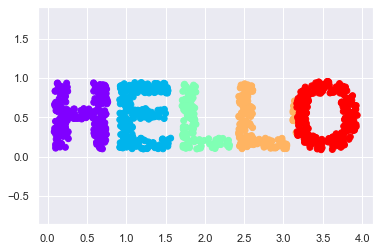

In [2]:
X = make_hello(1000)
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))

plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

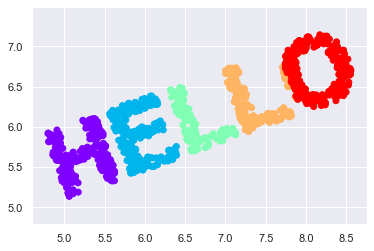

In [3]:
print(X.shape)
def rotate(X, angle) :
    theta = np.deg2rad(angle)      # 라디안 - 호의 길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬 회전
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X, R) # 1000x2 2x2 => 1000x2
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

(1000, 1000)


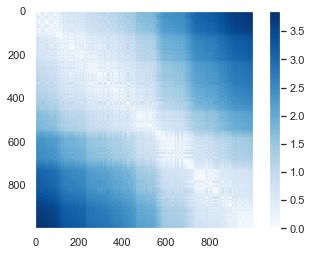

In [4]:
# 각 점들간의 상호거리 (euclidian distance)
from  sklearn.metrics import pairwise_distances # 디폴트 - 유클리디안
D = pairwise_distances(X) # 거리 행렬
print(D.shape)
D[:5, :5]
plt.imshow(D, zorder = 2, cmap = 'Blues', interpolation = 'nearest')
plt.colorbar()

In [5]:
D2= pairwise_distances(X2)
np.allclose(D,D2)

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


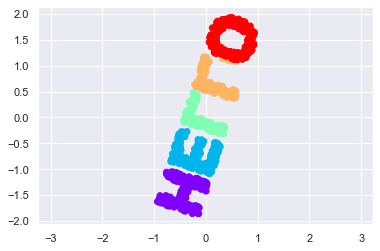

In [6]:
# 다형체 mainfold
from sklearn.manifold import MDS

# 미리 계산된 거리행렬을 이용해 차원 축소함
model = MDS(n_components=2, dissimilarity='precomputed', # 미계산
            random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1],**colorize)
plt.axis('equal')
print(out)

In [7]:
# 고유값 분해
import numpy as np

rng = np.random.RandomState(10) # seed 값
C = rng.randn(3,3) # normal
print(np.dot(C, C.T)) # 전치 행렬, 행렬의 거듭제곱
#                       => 정방행렬, 대칭행렬

# 고유값 분해
e, V = np.linalg.eigh(np.dot(C,C.T))
print("eigenvector",V) # 고유벡터
print("eigenvalue",e) # 고유값

np.dot(V[1],V[2]) # 두벡터의 내적 => 직교

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [8]:
# 2차원 -> 3차원으로 변환
def random_projection(x, dimension = 3, rseed = 42): # 분석용 불가 시각화용으로만
    assert dimension >= X.shape[1] # 행, 열중 열 값(2차원) => 차원확대만
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) # 3x3
    print("C는", C.shape)
    print(np.dot(C, C.T)) # 정방, 대칭행렬
    e, V = np.linalg.eigh(np.dot(C, C.T)) # 고유치, 고유벡터
    print("V는", V.shape) # 3x3
    print("차원은", V[:X.shape[1]])# 2차원
    return np.dot(X, V[:X.shape[1]]) # 3x2 (?)

print(X.shape)
print(X.shape[1])
print("데이터의 차원은", X.shape)
X3 = random_projection(X, 3)
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

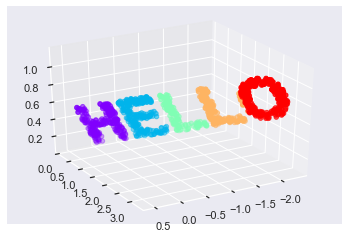

In [9]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], **colorize)
ax.view_init(azim = 60, elev = 30) # 3차원에서 카메라 각도 : azim 좌우로 60도 elev 상하로

(-1.0390064107727603,
 1.03771339899632,
 -2.0646660054511305,
 2.1354582444849126)

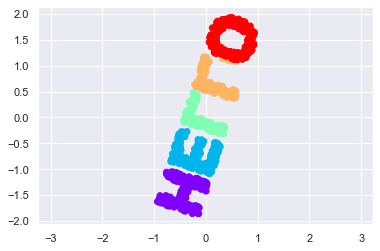

In [10]:
model = MDS(n_components = 2, random_state = 1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

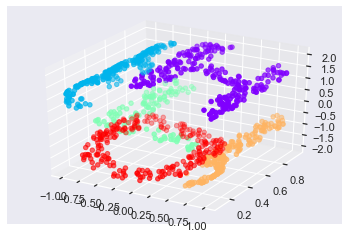

In [11]:
def make_hello_s_curve(X):
    t = (X[:,0] -2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t) -1 ) # sign = +-
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:,0] ,XS[:,1],XS[:,2],**colorize)
# MDS는 비선형에 취약, 선형에는 강하지만

(-1.322639384960314,
 1.1799486556119982,
 -2.1918230064186095,
 2.3891359457585004)

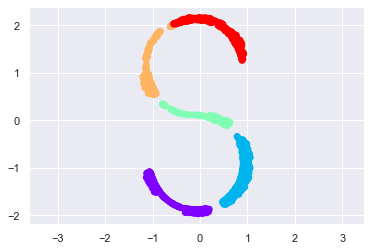

In [12]:
# MDS는 비선형에서 모양 유지가 안됨
model = MDS(n_components = 2, random_state = 1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

# LLE(Locally Linear Embedding)
 비선형에 강함

(0.15, -0.15)

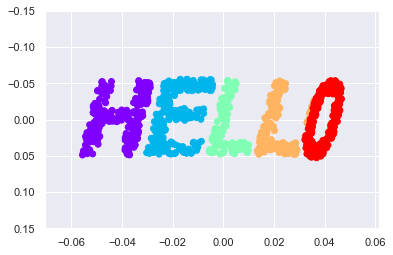

In [13]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors = 100, n_components = 2,
                               method = 'modified', eigen_solver = 'dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)

In [14]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import manifold # 다형체
from matplotlib import pylab
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
import os # 디렉터리 관리
CHART_DIR = "./"
colors = ['r', 'g', 'b']
markers = ['o', 6, '*']

def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')
    mds = manifold.MDS(n_components=3) # 변수 4-> 3
    Xtrans = mds.fit_transform(X) # 150x3
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black') 
        # 3차원이므로 3개
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15) # 카메라 각도 조절

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 

C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

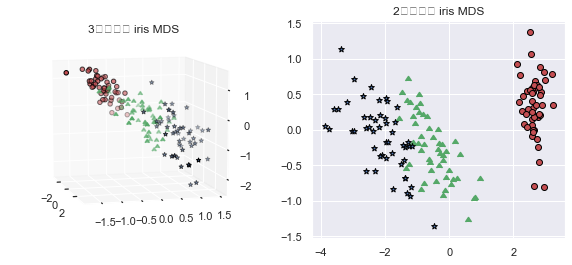

In [15]:
plot_iris_mds()

# k-means : 군집분석 => 종속변수 결정
- 압축 : 팔레트, 실제 데이터에는 팔레트 번호(256) 1바이트로 표현 가능
- 원형이상치 제거
- 미리 군집화해서 문제해결에 도움
    
# 알고리즘 : k값을 결정(군집수 결정), 중심값 결정(중심이 변화 -> 재계산)
- 문제점 :  이상치에 민감

# k-means의 척도 : 거리값(피타고라스 정리 -> euclidian distance)
# DBSCAN : eps 기본 거리값, 군집이 되기 위한 최소요소수
- 근거리에 있는 것끼리 군집
- 핵심, 경계, 어느 군집에도 속하지 않는 것

In [16]:
import scipy
import sklearn.metrics.pairwise
from sklearn.metrics.pairwise import euclidean_distances

a_64 = np.array([61.22, 71.60, -65.755], dtype = np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
# norm 원점으로부터의 거리(단일)
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], 
                     dtype = np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)],
                     dtype = np.float32)
# euclidian distance
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64], [b_32])
# menhattan거리 : 수평수직으로 재는것


In [17]:
print(dist_64_np)
print(dist_32_np)
print(dist_64_sklearn)

[0.03590265]
[0.0358995]
[[0.03590184]]


In [18]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # kmeans, PCA는 전처리에 민감
cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)

scaler = MinMaxScaler().fit(X_train) # chaining
X_train_scaled =  scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트 점수 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수 : 0.95


C:\Users\ICT01_21\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
from sklearn.pipeline import Pipeline
# 참조 :  파라미터를 전달하기 위해서
pipe = Pipeline([('scaler', MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(pipe.score(X_test, y_test)))

테스트 점수 : 0.95


C:\Users\ICT01_21\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# 격자 : 그물망
# pipeline + GridSearchCV는 다양한 테스트 문제를 해결
from sklearn.model_selection import GridSearchCV
# regularization 규제 : 과적합
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트 점수 : {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수 : ", grid.best_params_)

최상의 교차 검증 정확도 : 0.98
테스트 점수 : 0.97
최적의 매개변수 :  {'svm__C': 1, 'svm__gamma': 1}


Text(0.5, 1.0, 'K=4, J=28.02')

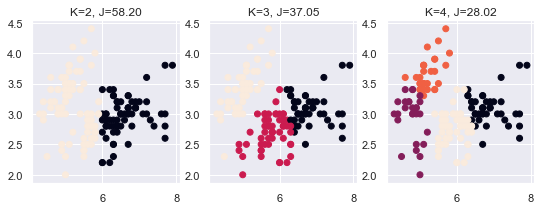

In [21]:
# 초기 중심값이 결정 입력 => 중심은 지속적으로 변화
# 중심과의 거리값
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = load_iris()
X = iris.data[:, :2] # 전체 변수 4 => 2개
y_iris = iris.target
km2 = cluster.KMeans(n_clusters = 2).fit(X)
km3 = cluster.KMeans(n_clusters = 3).fit(X)
km4 = cluster.KMeans(n_clusters = 4).fit(X)
plt.figure(figsize = (9, 3))
# 군집번호 : labels_
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c = km2.labels_) # 컬러 2(0,1)
plt.title("K=2, J=%.2f" % km2.inertia_) # 군집 내부 거리값
plt.subplot(132)
plt.scatter(X[:,0], X[:,1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:,0], X[:,1], c = km4.labels_)
plt.title("K=4, J=%.2f" %km4.inertia_)

In [22]:
km4.cluster_centers_

array([[6.86904762, 3.09285714],
       [4.77777778, 2.94444444],
       [5.22068966, 3.66551724],
       [5.91538462, 2.74807692]])

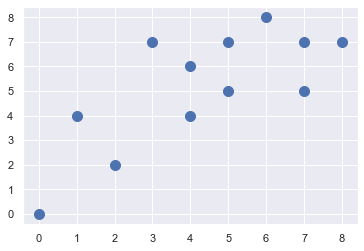

In [23]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
             [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

12


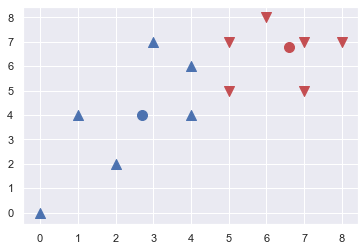

In [24]:
from sklearn.cluster import KMeans
# 레이블 : 군집번호 -종속변수
model = KMeans(n_clusters = 2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)
c0, c1 = model.cluster_centers_
print(len(model.labels_))
# boolean index
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker = 'v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker ='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c='r')
plt.scatter(c1[0], c1[1], s=100, c='b')
plt.show()

In [25]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [26]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

In [27]:
n_colors = 8
# 1바이트 = 8비트 = 256가지
china = load_sample_image("flower.jpg") # RGB(256컬러 : 1바이트)
# 컬러값 정규화 0~1 정규화
china = np.array(china, dtype = np.float64)/255

In [28]:
w, h, d = original_shape = tuple(china.shape) # 이미지는 행X열, 3
print(w,h,d) # 427 X 640, 3
assert d == 3  # RGB만 들어와라
image_array = np.reshape(china, (w*h, d)) # 2차원

427 640 3


In [29]:
# 1000개의 행
image_array_sample = shuffle(image_array, random_state = 0)[:1000]
# 64컬러로 그룹
kmeans = KMeans(n_clusters=n_colors, random_state = 0).fit(image_array_sample) # 64개의 중심값 결정

In [30]:
labels = kmeans.predict(image_array) # 라벨 427 x 640
len(labels)

273280

In [31]:
def recreate_image(codebook, labels, w, h) : # 64컬러값, 이미지픽셀수만큼 labels이 들어왔다.
    d = codebook.shape[1] # 64개의 중심값 64x3(r,g,b)
    image = np.zeros((w,h,d)) # 원래 이미지 사이즈
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx +=1
    return image

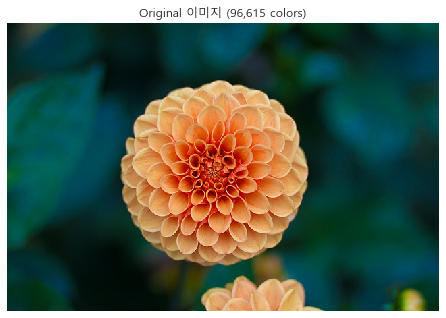

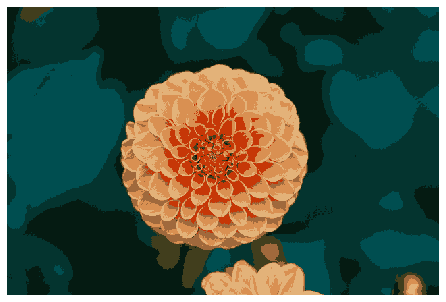

In [32]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original 이미지 (96,615 colors)')
plt.imshow(china)
# 신규이미지
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
# 64 컬러
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

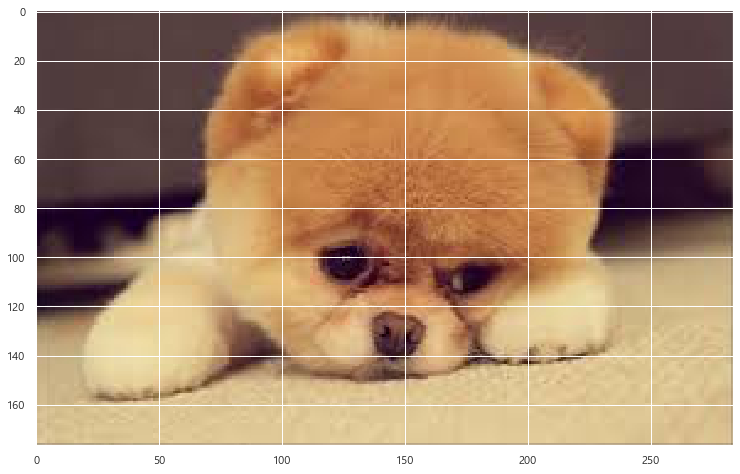

In [33]:
image = plt.imread("1.jpg")
plt.figure(figsize = (15, 8))
plt.imshow(image)

In [34]:
image.shape

(177, 284, 3)

In [35]:
# 바이트수 
image.shape[0] *  image.shape[1] * image.shape[2]

150804

In [36]:
x, y, z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x*y, z) # kmeans : 3차원을 얘기하지 못하기 때문에 차원축소함
image_2d.shape

(50268, 3)

In [37]:
kmeans_cluster = cluster.KMeans(n_clusters = 16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.90700756, 0.82144554, 0.61665508],
       [0.32531158, 0.23727096, 0.23807494],
       [0.79262789, 0.5301013 , 0.30192099],
       [0.8521018 , 0.67943016, 0.44624731],
       [0.13862321, 0.03572557, 0.1333056 ],
       [0.65381251, 0.38430449, 0.22143129],
       [0.82846139, 0.72328978, 0.52981324],
       [0.56273642, 0.42674244, 0.32133148],
       [0.81390826, 0.5920601 , 0.36139177],
       [0.44620479, 0.32407843, 0.26979894],
       [0.73801318, 0.46789663, 0.26517757],
       [0.25419797, 0.14066601, 0.16718559],
       [0.74751519, 0.63823185, 0.48045178],
       [0.86991735, 0.77518253, 0.5784685 ],
       [0.51522811, 0.27686361, 0.18737107],
       [0.67711351, 0.53101774, 0.38640523]])

In [38]:
len(cluster_centers)

16

In [39]:
cluster_centers.shape

(16, 3)

In [40]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

array([ 1,  1,  1, ..., 12, 12, 15])

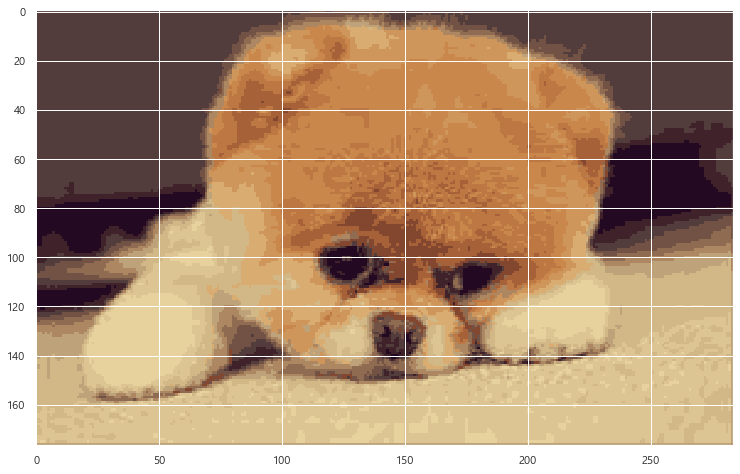

In [41]:
plt.figure(figsize =(15, 8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

# 원형 이상치 제거

In [42]:
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1)

In [43]:
kmeans = KMeans(n_clusters=1) # 중심 1개
kmeans.fit(X)
distances = kmeans.transform(X) # 각 데이터의 중심으로부터값으로 변환
sorted_idx = np.argsort(distances.ravel())[::-1][:5] # ravel() : 1차원으로/ argsort : 인덱스를 소트하라는 값
# [::-1] 내림차순해라.

C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


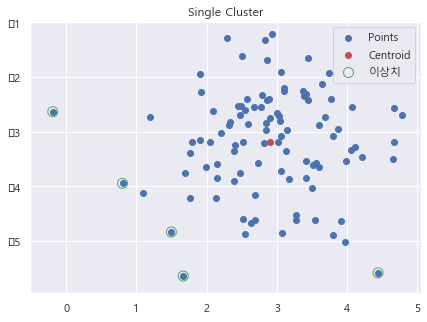

In [44]:
f, ax = plt.subplots(figsize = (7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1],
          label = 'Centroid', color = 'r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],
          label = '이상치', edgecolors = 'g',
          facecolors = 'none', s = 100)
ax.legend(loc = 'best')

In [45]:
# PCA : Principle Component Analysis 주성분분석
# 모델 입력 전단계에서 특징 추출(noise 제거)
# PCA의 결과를 모델의 변수로 추가하면 정확도상승
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components = 2) # 주성분 2개
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
print(pca.explained_variance_ratio_) # 설명력

[0.99244289 0.00755711]


# 차원축소후에 분석을 하면 좋은점
- noise 제거
- 속도개선
- 차원의 저주 => 복잡한 문제 해결

In [47]:
print(pca.explained_variance_) # 분산이 큰 것이 주성분
print(pca.noise_variance_)

[7.93954312 0.06045688]
0.0


In [48]:
# svd 희소행렬 특징 추출, 비정렬행열인 경우 사용
# 사이즈가 500x500 -> randomized
# 0을 줄여서 표현해 줘라 -> arpack
pca = PCA(n_components=2, svd_solver='full') # 'randomized.arpack'
# singular value decomposition
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train , X_test, y_train , y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_train.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(426, 30)


In [50]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.62


C:\Users\ICT01_21\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\Users\ICT01_21\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled =scaler.transform(cancer.data)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 30)


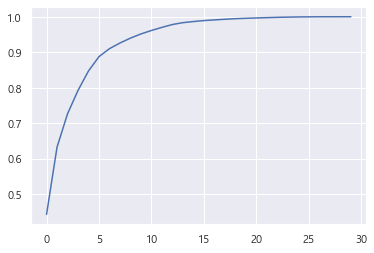

In [54]:
pca = PCA(n_components =30)
pca.fit(X_scaled)
## 2개의 주성분을 출력
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
# 569, 30
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인

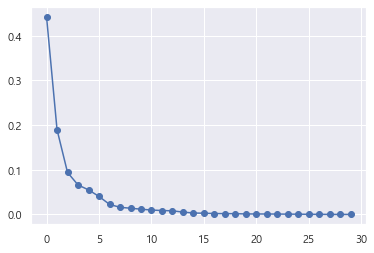

In [55]:
plt.plot(pca.explained_variance_ratio_,'bo-')

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # z점수 정규화
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 6) # 전체 변수 30개
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 정확도 : {:.2f}".format(svm.score(X_t_test, y_test)))
# 가성비 : 
# 6개 92%    9개 94%    20개 95%    30개 97%

SVM 테스트 정확도 : 0.92


C:\Users\ICT01_21\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [57]:
print("PCA 주성분 형태 : {}".format(pca.components_.shape))
# 주성분을 30개의 변수가 설명 -> 주성분축 새롭게 생성 -> 명명
# 변수의 기여도를 보고 명명식

PCA 주성분 형태 : (6, 30)


In [58]:
print("PCA 주성분 : {}".format(pca.components_))
# 제 1 주성분에 9.25782919e-02가 가장 영향을 미쳤다.

PCA 주성분 : [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-

C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


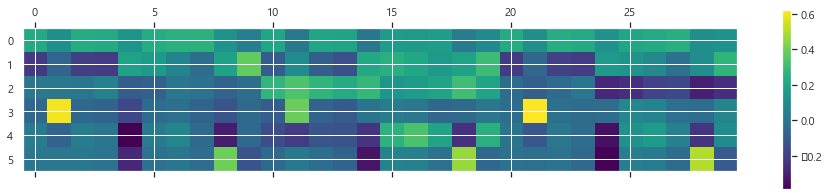

In [59]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()

(87, 65)


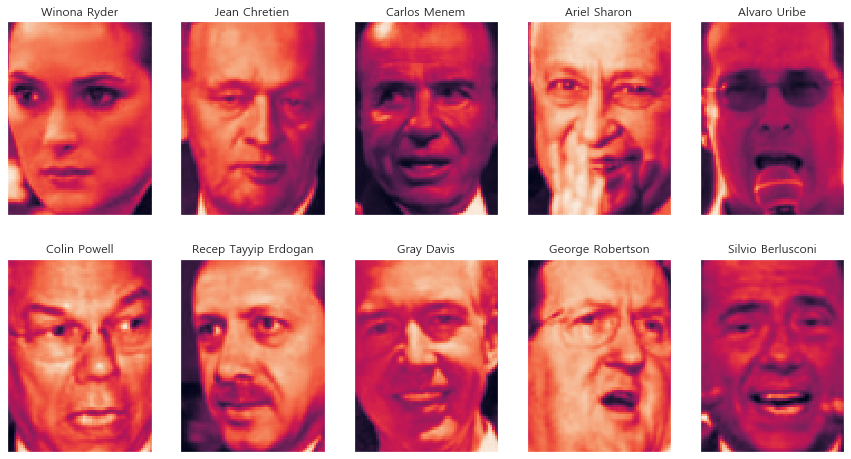

In [67]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people # fetch_lfw_people : 사람 얼굴을 다운받을 수 있는 함수
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7) # 적어도 20장 정도 비슷한 얼굴이 있는 것만 다운
image_shape = people.images[0].shape
print(image_shape) # 87*65 : 이미지를 읽을 때는 가로*세로, 행렬을 읽을 때는 행(세로방향)*열(가로방향)

fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
# 2,5 : 2*5 = 10장을 찍어라

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [68]:
print("이미지 사이즈 : {}".format(people.images.shape))
print("클래스 개수 : {}".format(len(people.target_names)))

이미지 사이즈 : (3023, 87, 65)
클래스 개수 : 62


In [69]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target) :
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 0)

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components =  100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

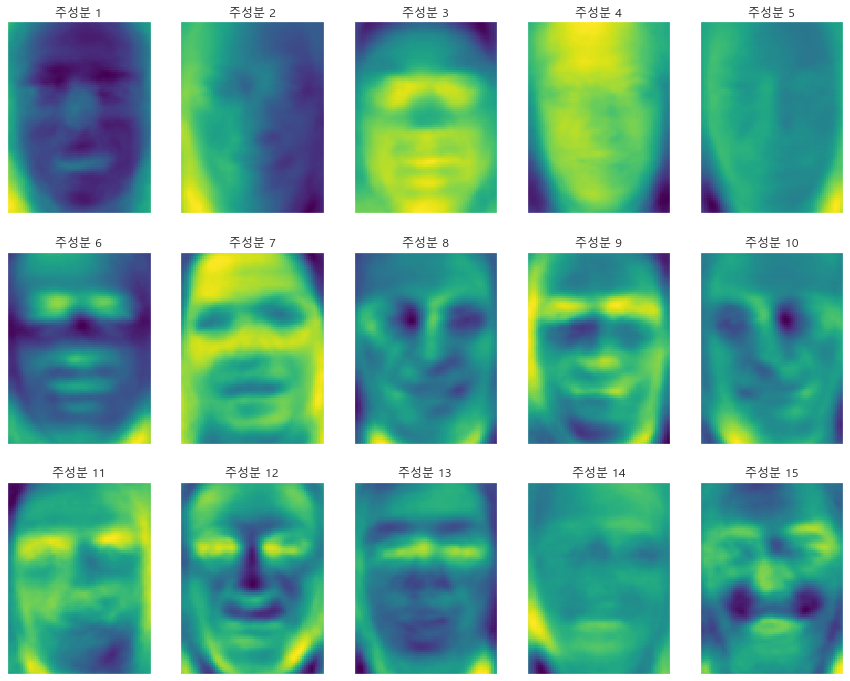

In [72]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12),
                        subplot_kw={'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

# 컴퓨터가 주성분 분석을 통해 찾아낸 주성분
100개를 합하여 출력 원본이미지를 복원 => ANN의 가중치 특징도 설명할 수 없다.